# Week Four: Random numbers

To be graded, your notebook must be runnable start to finish. If you can't make an in-notebook test pass, comment it out for to attempt to get partial credit. You should replace the `...` markers with your code. Do not change the names of the pre-defined ALL_CAPS variables and functions. (If you start from scratch, make sure you match the requested function names and requested ALL_CAPS variables). Other that that, you are free to define or make anything you wish. Remember that functions will often be tested with different numbers than the ones you are given.

This notebook will also be graded for plots - please make sure you save the notebook with the plots present, just in case I have a problem running them. If you change to the notebook backend (or any other backend), I recommend changing back to inline and re-running before saving the file - some of the more interactive backends don't get captured in the saved file.

In [1]:
# EID is your 6+2 UC Electronic ID
EID = '800278509'
NAME = 'Trevor Ford'

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D plots

## Problem 1: Random number generation

#### 1.1: Linear congruent generator

Implement the linear congruent random number generator. It's okay to use the iterator system in the lecture notes if you understand it, or you can implement your own without iterators. The **function** you write as an answer should return a numpy array.

<font color="grey">
> Hint if you use iterators: to save a bit of time and memory, you can use
> ```python
> arr = np.fromiter(lin_cong_iter(...), dtype=...)
> ```
> to skip turning an iterator into a list before calling array instead of
> ```python
> arr = np.array(list(lin_cong_iter(...)))
> ```
> 

In [3]:
def linear_cong(c, a, M, r_0):
  """generates a non-repeating sequence of pseudorandom numbers using the
  linear congruent generator algorithm"""
  rand_num=np.array(r_0)                                                        #initialize an array
  while True:                                                                   #repeats until pattern starts repeating
    r_1=(a*r_0+c)%M
    if r_1 not in rand_num:                                                     
      rand_num=np.append(rand_num,r_1)
      r_0=r_1
      continue
    else:
      break
  return rand_num

In [4]:
assert np.all(linear_cong(1,4,9,3) == np.array([3, 4, 8, 6, 7, 2, 0, 1, 5]))

## 1.2: Generator plot tests

Let's see if the following value make good random number sequences:

In [5]:
values_a = linear_cong(c=57, a=1, M=256, r_0=10)
values_b = linear_cong(c=1, a=57, M=256, r_0=10)
values_c = linear_cong(c=199, a=109, M=256, r_0=10)
values_d = np.arange(256)
np.random.seed(42)
np.random.shuffle(values_d)

For each of the four sequences listed above, plot y vs. x $\rightarrow$ $r_{2i}$ vs. $r_{2i+1}$, where $r$ is a random sample and index $2i$ is even (Figure 5.1 in the book). Don't connect the dots in the plot! You should set up a function that does the plotting for you. It's up to you on how much to put in the function, and how much to do outside. Add axis labels and a title that includes "a", "b", "c", or "d", depending on the sample. This answer does not need to match a special pattern, I'll be grading it by eye. Personally, I made a 2x2 suplots grid then ran my function on each axes. Since the default spacing was awful, I called `plt.tight_layout()` after making the plots.

In [6]:
# Recommended: define a plotting function of some sort here
def plotting(values,title):
  """plots position-related sequence values against each other on an 
  xy-coordinate plane - x is an odd-numbered sequence entry 
  (sequence numbering starting at 0) that is 1 entry after the
  corresponding y value"""
  if len(values)%2 == 0:                                                        #checks if list has even or odd number of entries
    x_data=[values[i] for i in range(len(values)) if i%2 == 1]                  #gives list of odd-index sequence values
    y_data=[values[i] for i in range(len(values)) if i%2 == 0]                  #gives list of even-index sequence values
  else:
    x_data=[values[i] for i in range(len(values)) if i%2 == 1]                  #gives list of odd-index sequence values
    y_data=[values[i] for i in range(len(values)-1) if i%2 == 0]                #gives list of even-index sequence values
  axis.set_title(title,fontsize=10)
  axis.grid(True)
  axis.plot(x_data,y_data,"+",color="#1b007d")

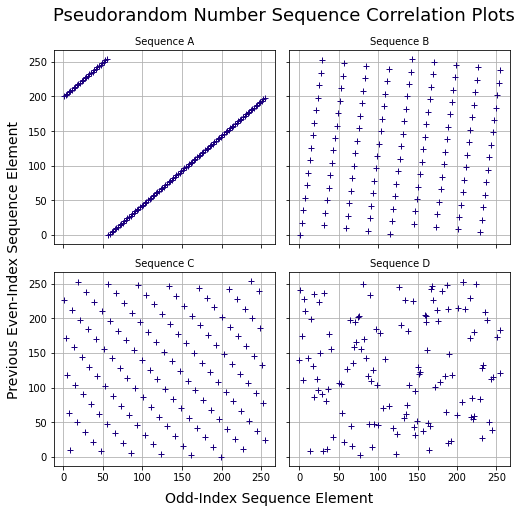

In [7]:
fig,ax=plt.subplots(nrows=2,ncols=2,sharex="col",sharey="row",figsize=(7, 6.5))

plotdata={0:("Sequence A",values_a),1:("Sequence B",values_b),                  #supplies data and titles to plot
           2:("Sequence C",values_c),3:("Sequence D",values_d)}

for i, axis in enumerate(ax.ravel()):                                           #plots data into each subplot
  plotting(plotdata[i][1],plotdata[i][0])

plt.tight_layout()
plt.suptitle("Pseudorandom Number Sequence Correlation Plots",
             fontsize=18,x=0.53,y=1.04)
fig.text(0.5,-0.02,"Odd-Index Sequence Element",ha="center",fontsize=14)
fig.text(-0.02,0.5,"Previous Even-Index Sequence Element",va="center",
         rotation="vertical",fontsize=14)
plt.show()

### 1.3: Deviations from uniformity

Write a function to compute the $k$th moment of a random number sequence. We'll then test the standard random number generator from Numpy with it.

$$
\frac{1}{N} \sum_{i=1}^{N} x^{k}_{i}
$$

In [8]:
def moment(distribution, k):
  """returns the kth empirical moment of a sample/random number sequence"""
  return np.sum(distribution**k)/len(distribution)

In [9]:
print('Should be around 1/2: k=1: ', moment(np.random.rand(100_000), 1))
print('Should be around 1/3: k=1: ', moment(np.random.rand(100_000), 2))
print('Should be around 1/4: k=1: ', moment(np.random.rand(100_000), 3))

Should be around 1/2: k=1:  0.5009985940154307
Should be around 1/3: k=1:  0.33330940157383265
Should be around 1/4: k=1:  0.2507988349099685


If this is truly random, the distribution of many trials should vary roughly as $1/\sqrt{N}$:

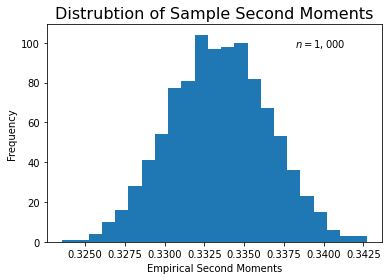

Variance = 9.673874847346571e-06


In [10]:
trials = [moment(np.random.rand(10_000), 2) for _ in range(1000)]               #computes the second moments of 1000
plt.title("Distrubtion of Sample Second Moments",fontsize=16)                   #n=10000 random samples
plt.figtext(0.70,0.80,"$n=1,000$")
plt.xlabel("Empirical Second Moments")
plt.ylabel("Frequency")
plt.hist(trials,bins="auto");
plt.show()

print(f"Variance = {np.var(trials)}")                                           #note that the variance of this
                                                                                #sampling distribution of sample second
                                                                                #moments is not ~1/sqrt(N), thus these
                                                                                #numbers are not truly random

## Problem 2: A 3D random walk

In class I showed you how to do a 2D random walk. Let's try a 3D one. You can either return 3 length N arrays (x, y, and z), or a [3,N] array with all three dimensions (the function can be done cleanly in 3-5 lines this way
). Due to the way iteration over arrays was implemented, unpacking will work exactly the same in both cases so you'll have the same user interface. The radius should be consistently 1. Use the same generation in $\Delta x$, etc. that was used even though the directions will be slightly unevenly distributed.

In [11]:
def rwalk3D(size):
  """step_size=1 ; generates consecutive (x,y,z) coordinates for a random walk
  process with n=size steps"""
  unnorm_xyz=2*np.random.rand(size,3)-1                                         #generates n=size steps in 3D
  norm_xyz=unnorm_xyz/np.sqrt(np.sum(unnorm_xyz**2,axis=1,keepdims=True))       #normalizes each step to length 1,
  x_vals=np.cumsum(norm_xyz,axis=0)[:,0]                                        #as requested
  y_vals=np.cumsum(norm_xyz,axis=0)[:,1]
  z_vals=np.cumsum(norm_xyz,axis=0)[:,2]
  return x_vals,y_vals,z_vals

Here's a quick plot to see how you did:

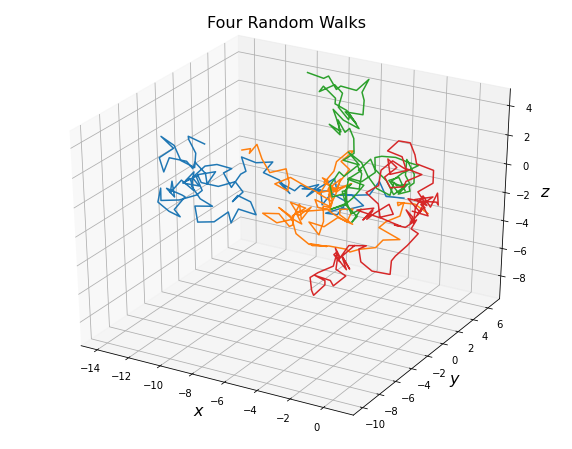

In [12]:
np.random.seed(41)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(*rwalk3D(100))
ax.plot(*rwalk3D(100))
ax.plot(*rwalk3D(100))
ax.plot(*rwalk3D(100))
ax.set_title("Four Random Walks",y=1.02,fontsize=16)
ax.set_xlabel("$x$",fontsize=16)
ax.set_ylabel("$y$",fontsize=16)
ax.set_zlabel("$z$",fontsize=16)
plt.show()

Build a function that computes N values from N random walks of length `size`, and then outputs an N length array with the results of those trials. You can reuse your function above, or rewrite it - cumulative summing wastes time and memory if you only need the final sum.

Note, if you want, you can even do this without a Python loop - you can make a 3D array, `[3, N_trials, size]`, and do everything on that! But you'll have to be careful when summing to select the right axes, and you'll need to organize things to make the division work with broadcasting.

In [13]:
def rwalk3Dsum(size, N_trials):
  """step_size=1 ; simulates N=N_trials number of random walks of n=size steps,
  then returns the array of distances for every walker"""
  distances=np.array([])                                                        #initialize distance array
  for i in range(N_trials):
    unnorm_xyz=2*np.random.rand(size,3)-1                                       #generate sample as before
    norm_xyz=unnorm_xyz/np.sqrt(np.sum(unnorm_xyz**2,axis=1,keepdims=True))     #normalize as before
    distances=np.append(distances,                                              #appends total distance of trial
                        [np.sqrt(np.sum(np.sum(norm_xyz,axis=0)**2))])          #to distance array
  return distances                                                              

Let's just verify that we get reasonalble results. 100 steps should give us a width of about 10.

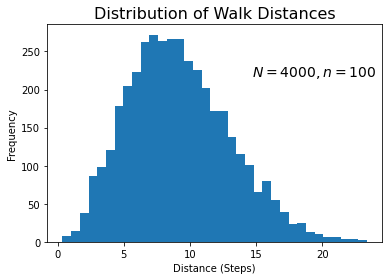

In [14]:
plt.hist(rwalk3Dsum(100, 4000), bins='auto')                                    #generates 4000 trials of 100 steps
plt.title("Distribution of Walk Distances",fontsize=16)
plt.xlabel("Distance (Steps)")
plt.ylabel("Frequency")
plt.figtext(0.6,0.7,"$N=4000,n=100$",fontsize=14);

## Problem 3: Particle decay

Write a function that produces a histogram of decay times for a collection of particles, given an initial number of particles, a decay probability, and a number of time bins to calculate. You should build the histogram array directly instead of using the method I used in class; this way you skip building up a list. Just start with an array initialized to 0 then add to the correct time bin every time a particle decays. You can avoid the inner loop if you wish by using arrays, but you can't easily avoid the outer loop since each step depends on the number of particles left after the previous step.

In [15]:
def decay_bins(particles, decay_prob, bins):
  """simulates particle decay using a constant decay probability
  model in which the decay probability is applied every time another
  time unit passes - returns arrays that can be used to plot particle
  decay counts as a function of time units passed"""
  decay_times=np.array([])
  for i in range(particles):
    t=0
    while True:
      if np.random.rand(1) <= decay_prob:                                       #compares random number from ~cunif[0,1]
        decay_times=np.append(decay_times,[t])                                  #distribution to cutoff value to model
        break                                                                   #particle decay
      t+=1
      if t > bins:                                                              #stops counting after t=bins time units
        break
  decay_counts,time_bins=np.histogram(decay_times,bins)
  time_bins=time_bins[:-1]                                                      #removes upper hist bound to allow plotting
  return time_bins,decay_counts                                                 #in next section below

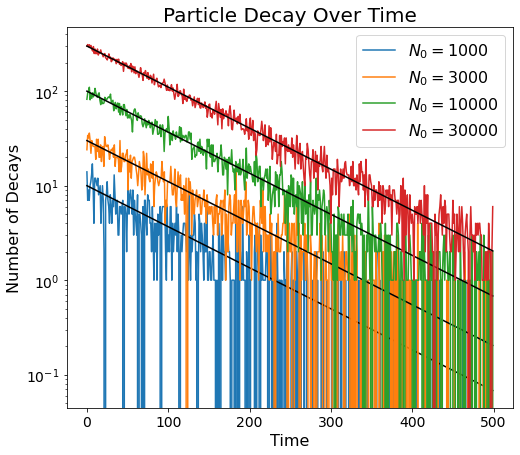

In [16]:
np.random.seed(42)
fig, ax = plt.subplots(figsize=(8,7))
x = np.arange(500)

plt1,=ax.plot(*decay_bins(particles=1_000, decay_prob=0.01, bins=500))
ax.plot(0.01*1_000*np.exp(-0.01*x), 'k')

plt2,=ax.plot(*decay_bins(particles=3_000, decay_prob=0.01, bins=500))
ax.plot(0.01*3_000*np.exp(-0.01*x), 'k')

plt3,=ax.plot(*decay_bins(particles=10_000, decay_prob=0.01, bins=500))
ax.plot(0.01*10_000*np.exp(-0.01*x), 'k')

plt4,=ax.plot(*decay_bins(particles=30_000, decay_prob=0.01, bins=500))
ax.plot(0.01*30_000*np.exp(-0.01*x), 'k')

labels=["$N_0=1000$","$N_0=3000$","$N_0=10000$","$N_0=30000$"]

ax.set_title("Particle Decay Over Time",fontsize=20)
ax.set_xlabel("Time",fontsize=16)
ax.set_ylabel("Number of Decays",fontsize=16)
ax.legend((plt1,plt2,plt3,plt4,),labels,markerfirst=True,fontsize=16)
ax.tick_params(labelsize=14)

#I don't like this figure on the logarithmic scale because our plotting arrays
#contain 0's and most numbers in our bins are small integers, which leads to the
#large number of "spikes" in the figure between the bottom and 10^1 when we
#connect them by a continuous line - I personally think the figure looks 
#much better and more informative on a linear y-scale

ax.set_yscale('log');                                                           